# Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [58]:
library(dplyr)
file <- read.csv('ufo_sighting_data.csv')
library(lubridate)
library(stringr)
air <- read.csv('airports.csv')



In [59]:
summary(file)
'Carpentry & Cleaning '
print('making the columns that signify into date variables for later analysis')
file$Date_time <- mdy_hm(file$Date_time)
file$date_documented <- mdy(file$date_documented)
ufo <- file

print('capitalizing abbreviations for state so I can later merge ufo data with airplane data properly, as well as changing the column names so their the same between the two date frames')
ufo$state.province <- toupper(as.character(ufo$state.province))

names(ufo)[names(ufo) == 'state.province'] <- 'STATE'
names(ufo)[names(ufo) == 'city'] <- 'CITY' 

print('extracting the hours to later determine when the best time to ufo hunt is')
ufo$time_hour <- hour(ufo$Date_time)

print('making the date_time column into just date. This is so I can figure out the amount of days from when the occurence happened and when it was documented')
ufo$Date_time <- as.Date(ufo$Date_time)

head(ufo)

            Date_time              city       state.province  country   
 7/4/2010 22:00  :   36   seattle    :  525   ca     : 9655     : 9670  
 7/4/2012 22:00  :   31   phoenix    :  454          : 5797   au:  538  
 11/16/1999 19:00:   27   portland   :  374   wa     : 4268   ca: 3000  
 9/19/2009 20:00 :   26   las vegas  :  368   fl     : 4200   de:  105  
 7/4/2011 22:00  :   25   los angeles:  353   tx     : 3677   gb: 1905  
 10/31/2004 20:00:   23   san diego  :  338   ny     : 3219   us:65114  
 (Other)         :80164   (Other)    :77920   (Other):49516             
    UFO_shape     length_of_encounter_seconds described_duration_of_encounter
 light   :16565   300    : 8635               5 minutes : 4716               
 triangle: 7865   120    : 7110               2 minutes : 3500               
 circle  : 7608   600    : 6312               10 minutes: 3322               
 fireball: 6208   60     : 5866               1 minute  : 3061               
 other   : 5649   180    :

[1] "Carpentry & Cleaning "

[1] "making the columns that signify into date variables for later analysis"


Warning message:
“ 694 failed to parse.”

[1] "capitalizing abbreviations for state so I can later merge ufo data with airplane data properly, as well as changing the column names so their the same between the two date frames"
[1] "extracting the hours to later determine when the best time to ufo hunt is"
[1] "making the date_time column into just date. This is so I can figure out the amount of days from when the occurence happened and when it was documented"


Date_time,CITY,STATE,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,time_hour
<date>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<date>,<fct>,<dbl>,<int>
1949-10-10,san marcos,TX,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,2004-04-27,29.8830556,-97.941111,20
1949-10-10,lackland afb,TX,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,2005-12-16,29.38421,-98.581082,21
1955-10-10,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,2008-01-21,53.2,-2.916667,17
1956-10-10,edna,TX,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,2004-01-17,28.9783333,-96.645833,21
1960-10-10,kaneohe,HI,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,2004-01-22,21.4180556,-157.803611,20
1961-10-10,bristol,TN,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi,2007-04-27,36.595,-82.188889,19


In [60]:
print('continued ufo carpentry & cleaning') 

print('introducing NAs to be filtered out later and chagning factor columns to character')

ufo$UFO_shape <- as.character(ufo$UFO_shape)
ufo$CITY <- as.character(ufo$CITY)
ufo$STATE <- as.character(ufo$STATE)
ufo$STATE[ufo$STATE == ""] <- NA

print('taking care of unnecessary white spaces in shape column, then doing same for city')
ufo$UFO_shape <- gsub(" ","",ufo$UFO_shape)
ufo$CITY <- str_trim(ufo$CITY)

print('introducing days of the week so I can compare later on')
ufo$dotw <- weekdays(ufo$Date_time)

[1] "continued ufo carpentry & cleaning"
[1] "introducing NAs to be filtered out later and chagning factor columns to character"
[1] "taking care of unnecessary white spaces in shape column, then doing same for city"
[1] "introducing days of the week so I can compare later on"


In [61]:
'airports carpentry'
print('filtering so data is only consisting of the contiguous US')
air <- filter(air, STATE != 'AK' & STATE != 'HI' & STATE != 'PR' & STATE != 'AS' & STATE != 'DC' & STATE != 'GU' & STATE != 'VI') 

print('getting rid of the columns I will not need')
air1 <- subset(air, select = c('LATITUDE','LONGITUDE', 'CITY', 'STATE'))

print('lowering the values in the city columns for unifromity with ufo data frame')
air1$CITY <- tolower(air1$CITY) 
print('creating the data frame I will use for the merge')
air2 <- subset(air1, select = c('CITY', 'STATE'))

print('creating a new column that will transfer when I merge the data frames so I can know which occurences took place in the same city an airport is located in')
air2$city_have_airport = c('yes')

print('AH cities like st. louis dont currently contain the period after st, so I will go ahead and fix that')
air2$CITY <- sub('st ', 'st. ', air2$CITY)

head(air2)

[1] "airports carpentry"

[1] "filtering so data is only consisting of the contiguous US"
[1] "getting rid of the columns I will not need"
[1] "lowering the values in the city columns for unifromity with ufo data frame"
[1] "creating the data frame I will use for the merge"
[1] "creating a new column that will transfer when I merge the data frames so I can know which occurences took place in the same city an airport is located in"
[1] "AH cities like st. louis dont currently contain the period after st, so I will go ahead and fix that"


CITY,STATE,city_have_airport
<chr>,<fct>,<chr>
allentown,PA,yes
abilene,TX,yes
albuquerque,NM,yes
aberdeen,SD,yes
albany,GA,yes
nantucket,MA,yes


## Step 5: Filter Results and Build/Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [62]:
print('filtering')
('only considering dates after 2000, most recent are probably consistent with curernt patterns')
ufo <- filter(ufo, Date_time >= ymd('2000-01-01'))

print('only considering at US sightings')
ufo <- filter(ufo, country == 'us')

print('omitting nas for states and omtiing states that arent in the contiguous US')
ufo <- na.omit(ufo, cols = c("STATE"))
ufo <- filter(ufo, STATE != 'AK' & STATE != 'HI' & STATE != 'PR')

print('specifying shape to be triangle')
ufo <- filter(ufo, UFO_shape == 'triangle')

[1] "filtering"


[1] "only considering dates after 2000, most recent are probably consistent with curernt patterns"

[1] "only considering at US sightings"
[1] "omitting nas for states and omtiing states that arent in the contiguous US"
[1] "specifying shape to be triangle"


In [63]:
'what state has the most sightings'
ufo%>% group_by(STATE) %>% summarize(number_of_occurences_per_state = n()) %>% arrange(desc(number_of_occurences_per_state))
state_data <- ufo%>% group_by(STATE) %>% summarize(number_of_occurences_per_state = n())
print("california seems like it could be a contender")
mean(state_data$number_of_occurences_per_state)


[1] "what state has the most sightings"

STATE,number_of_occurences_per_state
<chr>,<int>
CA,678
FL,289
TX,285
WA,270
IL,252
NY,206
OH,187
MI,174
AZ,173


[1] "california seems like it could be a contender"


[1] 107.4167

In [64]:
'what cities have the most sightings'
head(ufo %>% group_by(STATE, CITY) %>% summarise(number_of_occurences_per_city = n()) %>% arrange(desc(number_of_occurences_per_city)))
print("we can see that there have been a lot of occurences in these cities at the top of the list")

[1] "what cities have the most sightings"

STATE,CITY,number_of_occurences_per_city
<chr>,<chr>,<int>
AZ,phoenix,29
CA,san diego,27
WA,seattle,22
CA,los angeles,21
NV,las vegas,21
TX,austin,20


[1] "we can see that there have been a lot of occurences in these cities at the top of the list"


In [65]:
print('are aliens more likely to come in any particular day of the week?')
ufo$dotw <- weekdays(ufo$Date_time)
table(ufo$dotw) 
print(ufo %>% group_by(dotw) %>% summarise(percent = 100 * n()/ nrow( ufo)) %>% arrange(desc(percent)))
print('distribution seems uniform across days of the week, with slightly more occurences on Fridays and Saturdays. Lets see if any particular months stick out')

[1] "are aliens more likely to come in any particular day of the week?"



   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
      796       661       794       688       740       727       750 

# A tibble: 7 x 2
  dotw      percent
  <chr>       <dbl>
1 Friday       15.4
2 Saturday     15.4
3 Wednesday    14.5
4 Thursday     14.4
5 Tuesday      14.1
6 Sunday       13.3
7 Monday       12.8
[1] "distribution seems uniform across days of the week, with slightly more occurences on Fridays and Saturdays. Lets see if any particular months stick out"


In [66]:
ufo$month <- month(ufo$Date_time)
print(ufo %>% group_by(month) %>% summarise(percent = 100 * n()/ nrow( ufo)) %>% arrange(desc(percent)))
print('sightings occur at a higher rate in months 7-11')

# A tibble: 12 x 2
   month percent
   <dbl>   <dbl>
 1    11   10.0 
 2     9    9.99
 3    10    9.64
 4     8    9.52
 5     7    9.02
 6     3    8.63
 7     4    8.09
 8     1    7.78
 9    12    7.29
10     6    7.04
11     5    6.59
12     2    6.40
[1] "sightings occur at a higher rate in months 7-11"


In [67]:
print('what hour of the day do sightings occur the most?')

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

getmode(ufo$time_hour)

print('sightings occur most frequently in the 21st hour of the day')

print('overall distribution?')

head(ufo %>% group_by(time_hour) %>% summarise(number_of_occurences_per_hour = n()) %>% arrange(desc(number_of_occurences_per_hour)))
print('hours 20-23 seem like the best times to get sightings')
print(ufo %>% group_by(time_hour) %>% summarise(percent = 100 * n()/ nrow( ufo)) %>% arrange(desc(percent)))
print('these 4 hours account for over 50% of sightings')

[1] "what hour of the day do sightings occur the most?"


[1] 21

[1] "sightings occur most frequently in the 21st hour of the day"
[1] "overall distribution?"


time_hour,number_of_occurences_per_hour
<int>,<int>
21,802
22,774
23,598
20,577
19,409
0,300


[1] "hours 20-23 seem like the best times to get sightings"
# A tibble: 24 x 2
   time_hour percent
       <int>   <dbl>
 1        21   15.6 
 2        22   15.0 
 3        23   11.6 
 4        20   11.2 
 5        19    7.93
 6         0    5.82
 7        18    4.69
 8         1    4.46
 9         2    2.99
10         3    2.66
# … with 14 more rows
[1] "these 4 hours account for over 50% of sightings"


This is looking simple enough, go to california (probably san diego or la) between the months of july and november on a friday or saturday night from 8-11pm. I want to filter the data to account for sightings in the same cities as airports, which may be less reliable sightings, sightings less than 2 minutes in length, and sightings where the date in which they were documented is less than a ___ days from which they occured. This will strengthen realiability  

In [68]:
ufobb <- merge(ufo,air2, all.x = TRUE )
'doing this so i can distinguish which occurences happened within a city with an ariport'
ufobb$city_have_airport[is.na(ufobb$city_have_airport)] = 'No'
ufobb$length_of_encounter_seconds <- as.integer(as.character(ufobb$length_of_encounter_seconds))
more_reliable <- filter(ufobb, ufobb$length_of_encounter_seconds >= 120 & (ufobb$date_documented - ufobb$Date_time) < 100 & ufobb$city_have_airport == 'No')

[1] "doing this so i can distinguish which occurences happened within a city with an ariport"

In [69]:
paste('Lets see if any of our above findings change with this fileterd data')

[1] "Lets see if any of our above findings change with this fileterd data"

In [70]:
summary(more_reliable)

     CITY              STATE             Date_time          country  
 Length:2160        Length:2160        Min.   :2000-01-05     :   0  
 Class :character   Class :character   1st Qu.:2005-02-23   au:   0  
 Mode  :character   Mode  :character   Median :2008-11-27   ca:   0  
                                       Mean   :2008-07-11   de:   0  
                                       3rd Qu.:2012-03-16   gb:   0  
                                       Max.   :2014-05-05   us:2160  
                                                                     
  UFO_shape         length_of_encounter_seconds described_duration_of_encounter
 Length:2160        Min.   :    120             5 minutes : 250                
 Class :character   1st Qu.:    180             2 minutes : 195                
 Mode  :character   Median :    300             10 minutes: 136                
                    Mean   :   3020             3 minutes : 136                
                    3rd Qu.:    900     

In [71]:
print('what state has the most sightings')
print(more_reliable%>% group_by(STATE) %>% summarize(number_of_occurences_per_state = n()) %>% arrange(desc(number_of_occurences_per_state)))
print('california is still top of the list! we see quite a few changes now though')

[1] "what state has the most sightings"
# A tibble: 48 x 2
   STATE number_of_occurences_per_state
   <chr>                          <int>
 1 CA                               269
 2 IL                               120
 3 WA                               116
 4 TX                               100
 5 NY                                97
 6 FL                                92
 7 OH                                84
 8 MI                                81
 9 PA                                81
10 AZ                                69
# … with 38 more rows
[1] "california is still top of the list! we see quite a few changes now though"


In [73]:
'what cities have the most sightings'
head(more_reliable %>% group_by(STATE, CITY) %>% summarise(number_of_occurences_per_city = n()) %>% arrange(desc(number_of_occurences_per_city)))
print("this list has changed drastically, with tinley park Illinois now topping it ")

[1] "what cities have the most sightings"

STATE,CITY,number_of_occurences_per_city
<chr>,<chr>,<int>
IL,tinley park,16
CA,el cajon,11
AZ,mesa,8
CA,coalinga,7
DE,dover,6
OR,salem,6


[1] "this list has changed drastically, with tinley park Illinois now topping it "


In [74]:
print('are aliens more likely to come in any particular day of the week?')
print(more_reliable %>% group_by(dotw) %>% summarise(n = n()) %>% mutate(freq = n / sum(n)) %>% arrange(desc(freq)))
print('now fridays are still sticking out, but Saturdays are less frequent')

[1] "are aliens more likely to come in any particular day of the week?"
# A tibble: 7 x 3
  dotw          n  freq
  <chr>     <int> <dbl>
1 Friday      356 0.165
2 Thursday    330 0.153
3 Wednesday   325 0.150
4 Saturday    323 0.150
5 Tuesday     308 0.143
6 Sunday      265 0.123
7 Monday      253 0.117
[1] "now fridays are still sticking out, but Saturdays are less frequent"


In [75]:
more_reliable$month <- month(more_reliable$Date_time)
print(more_reliable %>% group_by(month) %>% summarise(percent = 100 * n()/ nrow( ufo)) %>% arrange(desc(percent)))
print('sightings occur at a higher rate in months 7 and 9')

# A tibble: 12 x 2
   month percent
   <dbl>   <dbl>
 1     7    4.05
 2     9    4.03
 3    11    4.01
 4     3    3.96
 5    10    3.80
 6     1    3.74
 7     8    3.72
 8    12    3.26
 9     4    3.08
10     2    2.93
11     5    2.75
12     6    2.54
[1] "sightings occur at a higher rate in months 7 and 9"


In [76]:
print('what hour of the day do sightings occur the most?')

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

getmode(more_reliable$time_hour)

print('sightings occur most frequently in the 21st hour of the day')

print('overall distribution?')

head(more_reliable %>% group_by(time_hour) %>% summarise(number_of_occurences_per_hour = n()) %>% arrange(desc(number_of_occurences_per_hour)))
print('hours 20-23 seem like the best times to get sightings')
print(more_reliable %>% group_by(time_hour) %>% summarise(n = n()) %>% mutate(freq = n / sum(n)) %>% arrange(desc(freq)))


[1] "what hour of the day do sightings occur the most?"


[1] 21

[1] "sightings occur most frequently in the 21st hour of the day"
[1] "overall distribution?"


time_hour,number_of_occurences_per_hour
<int>,<int>
21,320
22,313
20,283
23,228
19,183
0,134


[1] "hours 20-23 seem like the best times to get sightings"
# A tibble: 24 x 3
   time_hour     n   freq
       <int> <int>  <dbl>
 1        21   320 0.148 
 2        22   313 0.145 
 3        20   283 0.131 
 4        23   228 0.106 
 5        19   183 0.0847
 6         0   134 0.0620
 7        18   117 0.0542
 8         1    84 0.0389
 9         2    54 0.025 
10         3    54 0.025 
# … with 14 more rows


In [78]:
print('considering CA is still the state with the most abundant sightings, Im going to look at some California Specific Data')

Cal <- filter(more_reliable, STATE == 'CA')

print(Cal %>% group_by(dotw) %>% summarise(n = n()) %>% mutate(freq = n / sum(n)) %>% arrange(desc(freq)))
print(Cal %>% group_by(month) %>% summarise(n = n()) %>% mutate(freq = n / sum(n)) %>% arrange(desc(freq)))
print(Cal %>% group_by(time_hour) %>% summarise(n = n()) %>% mutate(freq = n / sum(n)) %>% arrange(desc(freq)))
print(Cal %>% group_by(CITY) %>% summarise(n = n()) %>% mutate(freq = n / sum(n)) %>% arrange(desc(freq)))



[1] "considering CA is still the state with the most abundant sightings, Im going to look at some California Specific Data"
# A tibble: 7 x 3
  dotw          n   freq
  <chr>     <int>  <dbl>
1 Saturday     48 0.178 
2 Tuesday      48 0.178 
3 Friday       40 0.149 
4 Wednesday    39 0.145 
5 Thursday     38 0.141 
6 Monday       35 0.130 
7 Sunday       21 0.0781
# A tibble: 12 x 3
   month     n   freq
   <dbl> <int>  <dbl>
 1     7    38 0.141 
 2     8    31 0.115 
 3     9    27 0.100 
 4     1    26 0.0967
 5    12    26 0.0967
 6     3    23 0.0855
 7     2    19 0.0706
 8    11    19 0.0706
 9     4    16 0.0595
10    10    16 0.0595
11     6    15 0.0558
12     5    13 0.0483
# A tibble: 21 x 3
   time_hour     n   freq
       <int> <int>  <dbl>
 1        22    42 0.156 
 2        21    37 0.138 
 3        20    35 0.130 
 4        19    29 0.108 
 5        23    26 0.0967
 6        18    19 0.0706
 7         0    13 0.0483
 8         1    11 0.0409
 9         5     8 0.0297
1

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [79]:
install.packages('maps', repos='http://cran.us.r-project.org')
library(maps)
library(ggplot2)



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [80]:
state <- map_data('state')

Warning message:
“Removed 3 rows containing missing values (geom_point).”

[1] "This uses the data before its filtered into more_reliable"


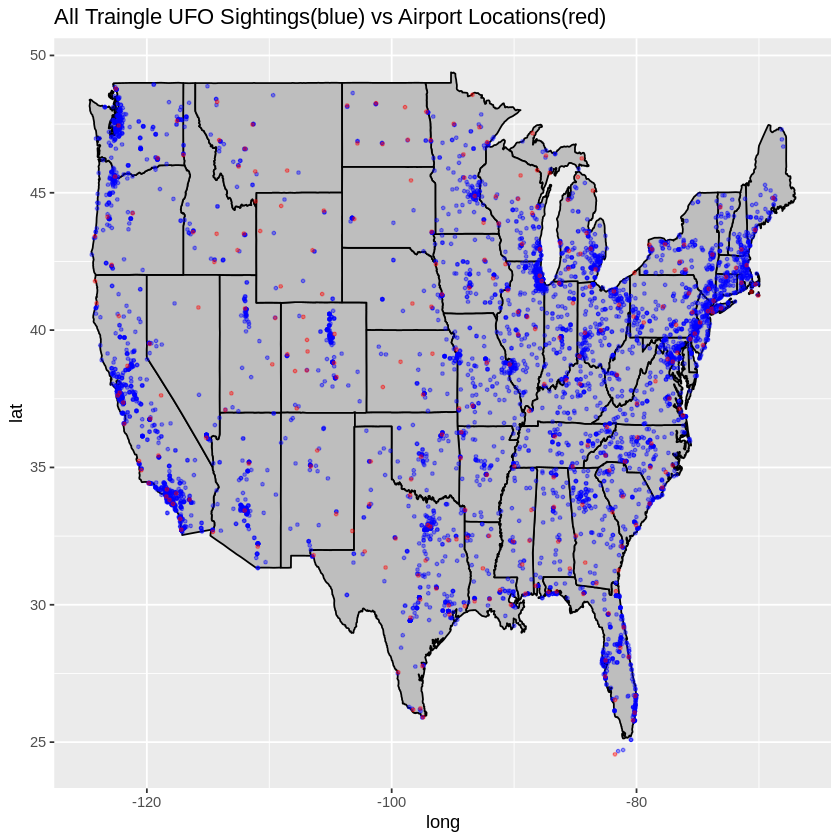

In [82]:
ggplot() + geom_polygon(data = state, aes(x=long, y= lat, group = group),color = 'black', fill = 'grey') + geom_point(data = ufo, aes(x= longitude,y= as.numeric(as.character(latitude))),color = 'blue', size = 0.7, alpha = 0.4) + geom_point(data = air1, aes(x= LONGITUDE,y= LATITUDE) ,color = 'red', size = 0.7, alpha = 0.4) + ggtitle('All Traingle UFO Sightings(blue) vs Airport Locations(red)')

print('This uses the data before its filtered into more_reliable')

Warning message:
“Removed 3 rows containing missing values (geom_point).”

[1] "This uses the data after its filtered into more_reliable"


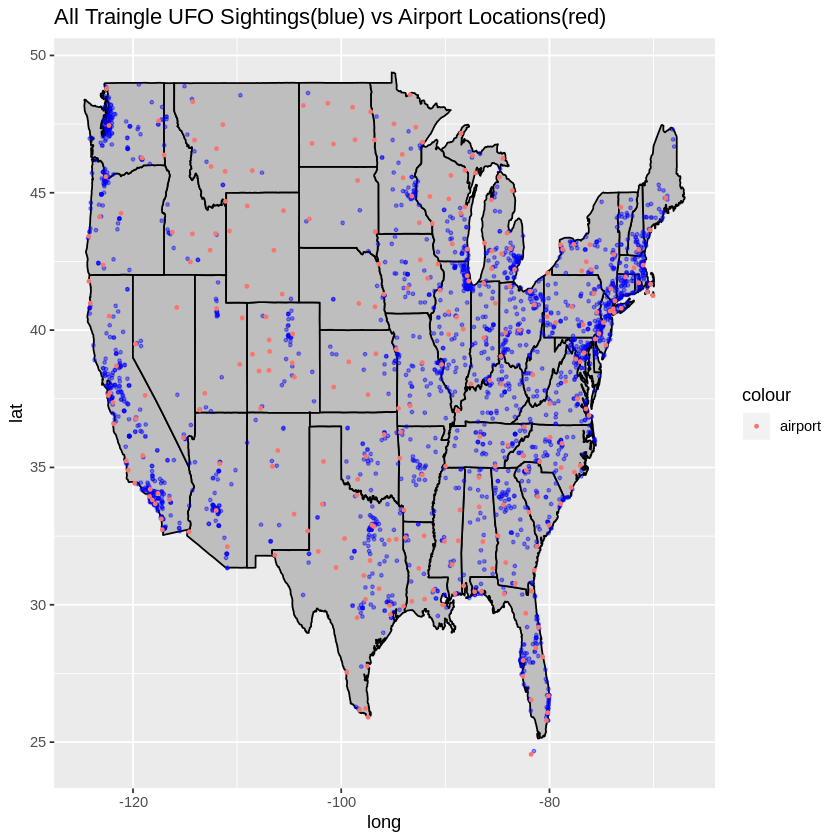

In [83]:
ggplot() + geom_polygon(data = state, aes(x=long, y= lat, group = group),color = 'black', fill = 'grey') + geom_point(data = more_reliable, aes(x= longitude,y= as.numeric(as.character(latitude))),color = 'blue', size = 0.7, alpha = 0.4) + geom_point(data = air1, aes(x= LONGITUDE,y= LATITUDE, color = 'airport') , size = 0.7) + ggtitle('All Traingle UFO Sightings(blue) vs Airport Locations(red)')

print('This uses the data after its filtered into more_reliable')

In [84]:
density <- ggplot() + geom_polygon(data = state, aes(x=long, y= lat, group = group),color = 'black', fill = 'grey') + stat_density_2d(data = ufo, aes(x = longitude, y = as.numeric(as.character(latitude)), fill = ..level..), geom = 'polygon', colour = 'white', alpha = 0.5) + scale_fill_gradient(low = 'seashell1', high = 'red4') + theme(legend.position = c(0.9,0.2)) + ggtitle('Triangle Shaped UFO Sightings in Contiguous United States')
('this visualization is made using all data(not the subset that I filtred through for quality), this shows locations with the densest amourt of sightings. We see hotspots in southern califronia, washington, souther mihcinga/northern illinois, and on the eastern coast line')

[1] "this visualization is made using all data(not the subset that I filtred through for quality), this shows locations with the densest amourt of sightings. We see hotspots in southern califronia, washington, souther mihcinga/northern illinois, and on the eastern coast line"

Warning message:
“Removed 3 rows containing missing values (geom_point).”

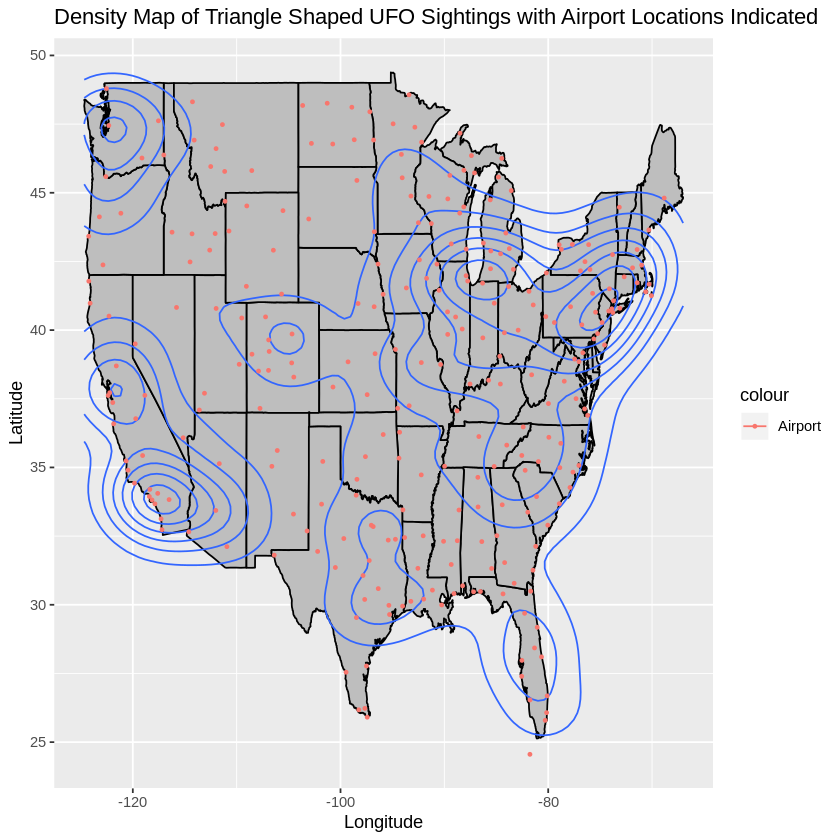

In [34]:
ggplot() + geom_polygon(data = state, aes(x=long, y= lat, group = group),color = 'black', fill = 'grey') + stat_density_2d(data = ufo, aes(x = longitude, y = as.numeric(as.character(latitude)))) + geom_point(data = air1, aes(x= LONGITUDE,y= LATITUDE, colour = 'Airport'), size = 0.7) + ggtitle('Density Map of Triangle Shaped UFO Sightings with Airport Locations Indicated') + xlab('Longitude') + ylab('Latitude')


Warning message:
“Removed 3 rows containing missing values (geom_point).”

[1] "This is the same map as above, but using the more_reliable data. We can see that a lot of density polygons have widened"

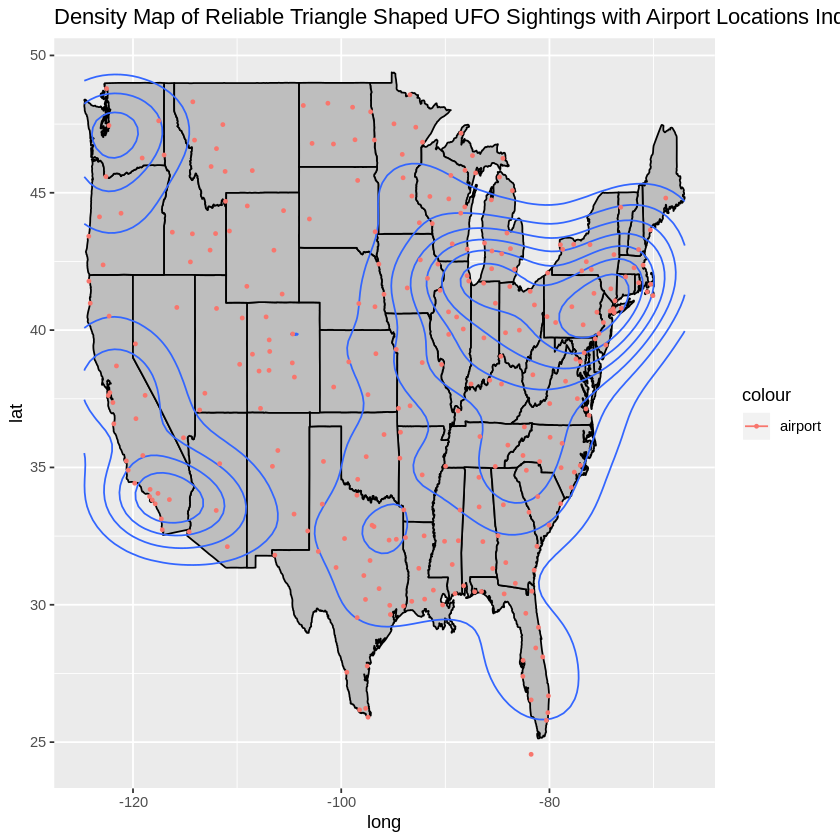

In [37]:
ggplot() + geom_polygon(data = state, aes(x=long, y= lat, group = group),color = 'black', fill = 'grey') + stat_density_2d(data = more_reliable, aes(x = longitude, y = as.numeric(as.character(latitude)))) + geom_point(data = air1, aes(x= LONGITUDE,y= LATITUDE, colour = 'airport'), size = 0.7) + ggtitle('Density Map of Reliable Triangle Shaped UFO Sightings with Airport Locations Indicated')
"This is the same map as above, but using the more_reliable data. We can see that a lot of density polygons have widened"

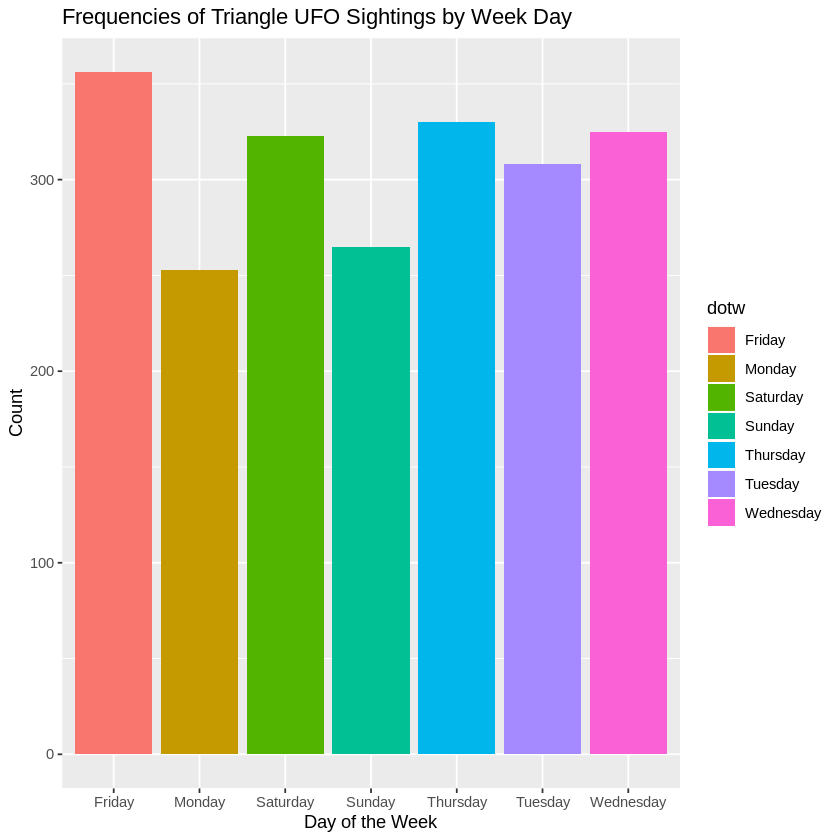

In [38]:
ggplot(data = more_reliable, aes(x=dotw)) + geom_bar(aes(fill = dotw)) + xlab('Day of the Week') + ylab('Count') + ggtitle('Frequencies of Triangle UFO Sightings by Week Day')

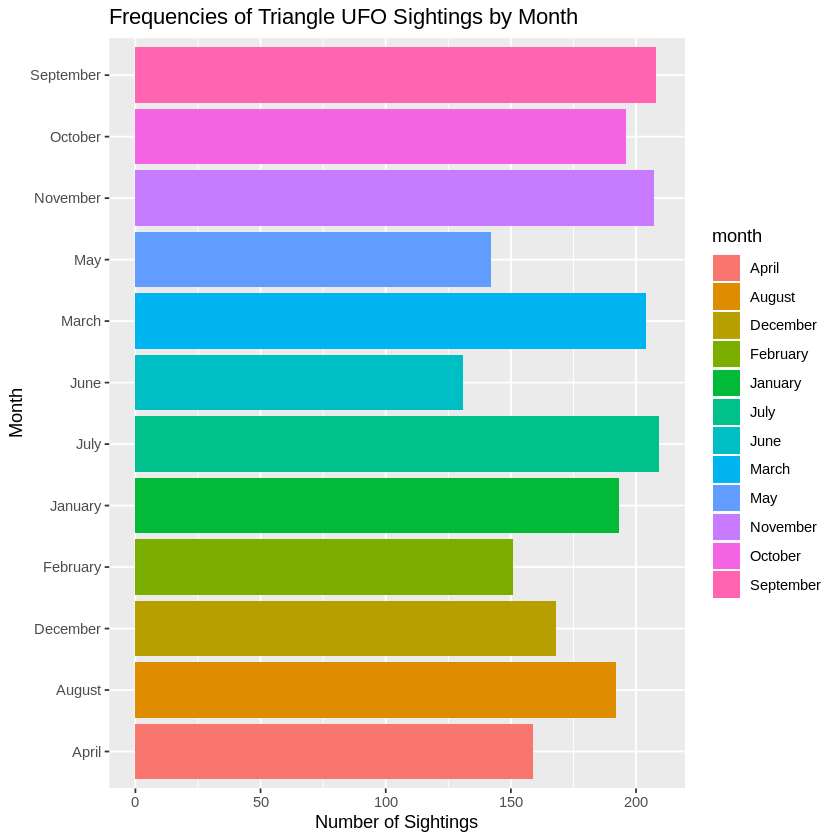

In [39]:
more_reliable$month <- month.name[more_reliable$month]
ggplot(data = more_reliable, aes(x=(month))) + geom_bar(aes(fill = month)) + xlab('Month') + ylab('Number of Sightings') + coord_flip() + ggtitle('Frequencies of Triangle UFO Sightings by Month')

[1] "we can see that most sightings happend late night rather than early morning"

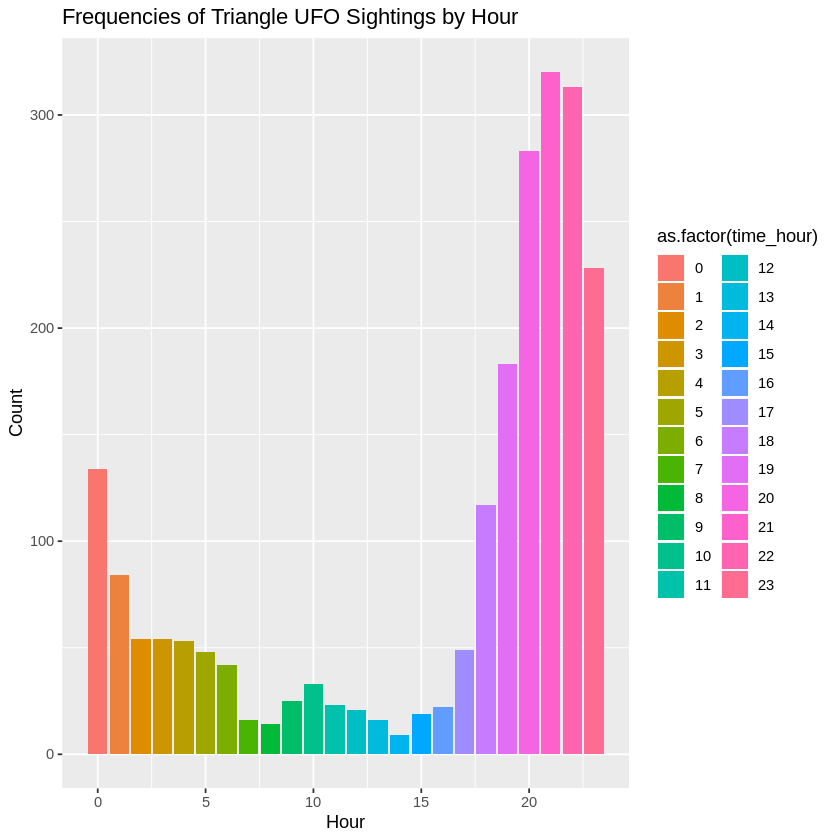

In [40]:
more_reliable1 <- more_reliable
more_reliable1 <- subset(more_reliable1, select = c(time_hour))
more_reliable1 <- arrange(more_reliable1, desc(time_hour))
ggplot(data = more_reliable1, aes(x=(time_hour))) + geom_bar(aes(fill = as.factor(time_hour))) + xlab('Hour') + ylab('Count') + ggtitle('Frequencies of Triangle UFO Sightings by Hour')
'we can see that most sightings happend late night rather than early morning'

[1] "california is the clear contender"


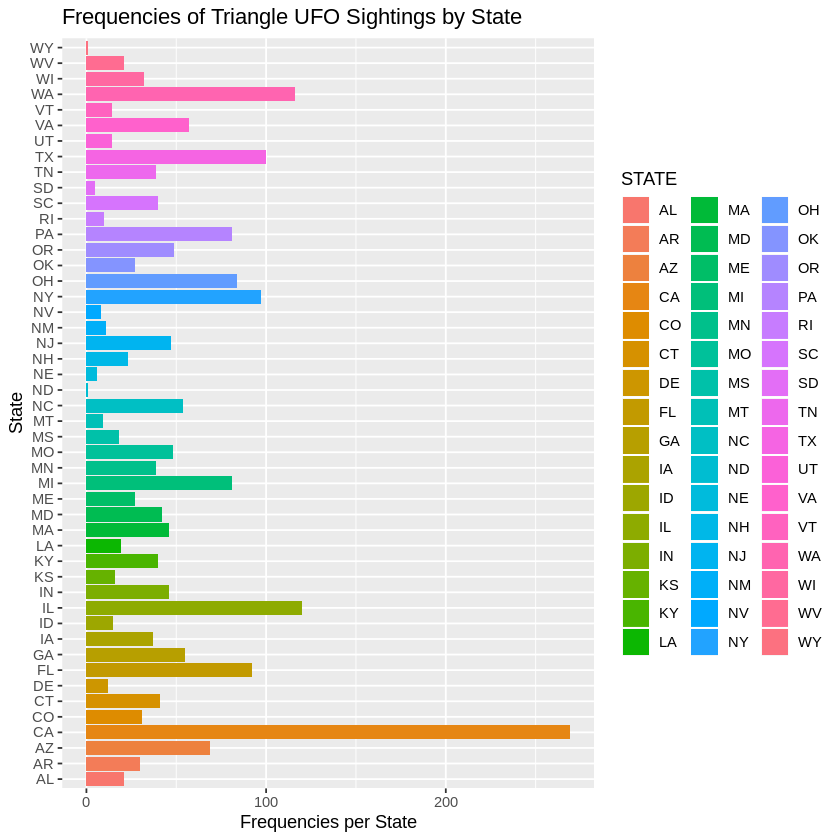

In [42]:
state <- ggplot(data = more_reliable, aes(x=(STATE))) + geom_bar(aes(fill = STATE)) + coord_flip() + xlab('State') + ylab('Frequencies per State') + ggtitle('Frequencies of Triangle UFO Sightings by State')
state
print('california is the clear contender')

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

'I would start by specifying that I believe California is the place to look for Traingle shaped UFOs, the most sightings ere reported there, before and after accounting for time between date of occurence and date of documentaion, if the city the sighting happened in has an airport, and if the sighting occured for at least 2 minutes.'
print(state)

The data I've gathered shows trends associated with sighting of triangle shaped ufo sightings in the contiguous United States. The first question I'd like to address is where you should look if trying to have a sighting of a triangle shaped UFO. At first, I decided to look by state, this isn't as accurate as looking at individual latitudes and longtitudes, but it suffice's when looking for general area's with upticks in sightings. California was the clear head for these sightings, foloweed by Florida. Let me emphasize though that this difference of 389 sightings. California's sightings were 678 while the average number of sightings per state was merely 107. I then expected to find that cities in California had the highest reports city wise. I was suprised to find that phoenix arizona was top of the list, with WA, NV, TX, also having cities within the top 6. 
	Upon mapping the data to get a better idea for location,  I realizaed that 'hotspots' for sightings (found with density maps) were mostly along costs. We see density polygons in WA, CA, FL, Upper east coast, as well as along the coast of the great lakes. I decided to map airports along with sighting locations to get a feel if there were an uptick in sightings when their were airports near. We can assume that at least some sightings are misclassified aviation. After seeing that it did look as if there was a lot of sightings near airports, I tried to make the data more reliable. If a sighting was in a city with an airport, was less than 2 minutes in length, or was reported 100 days after the sighting, I filtered it out. Even within this more_reliable data frame, California was the clear contender. The top city for reliable California sightings was el cajon. This is my choice for best place to have an investigation. 
	The other question of course if when are you most likely to experience a sighting. Before the data was filtered to more_reliable, mnoths august - november showed the highest percentage of sightings. These 5 months account for just over 48% of total sightings. Why could this be? Maybe ufos are more frequently in our atmosphere or there are optimal viewing conditions in these months. Even with more_reliable, these months had to highest sightings reported.When looking at data from only CA, it's worth nothing that July had the most abundant amount of sightings(14% total). As far as weekdays go, there wasn't a lot of variation. Especially when considering that the days with the most sightings were friday and saturday(when people are more likely to be out and about). When looking only at reliable CA data, we see the most sightings on Saturday and Tuesday (both accounting for 17.8% of sightings). I was not expecting to see Tuesday close to the top of the list! You could use this and go on a saturday or tuesday, but know that this could just be chance. One thing that was really clear from this data, your best shot is going between the hours of 19 -23. These hours account for 62% of all sightings in CA.  


'In summary
    Location - California is the right state to look for Triangle shaped UFOs. Speicifically, the city of el cajon acounts for 5% of sightings on its own so it may be a good place to start. We can also tell from our density plot that sightings are more frequent on the coast of southern or central CA.
    Time - July, specifically from the hours 20-23(8-11pm), on a Tuesday or Saturday'






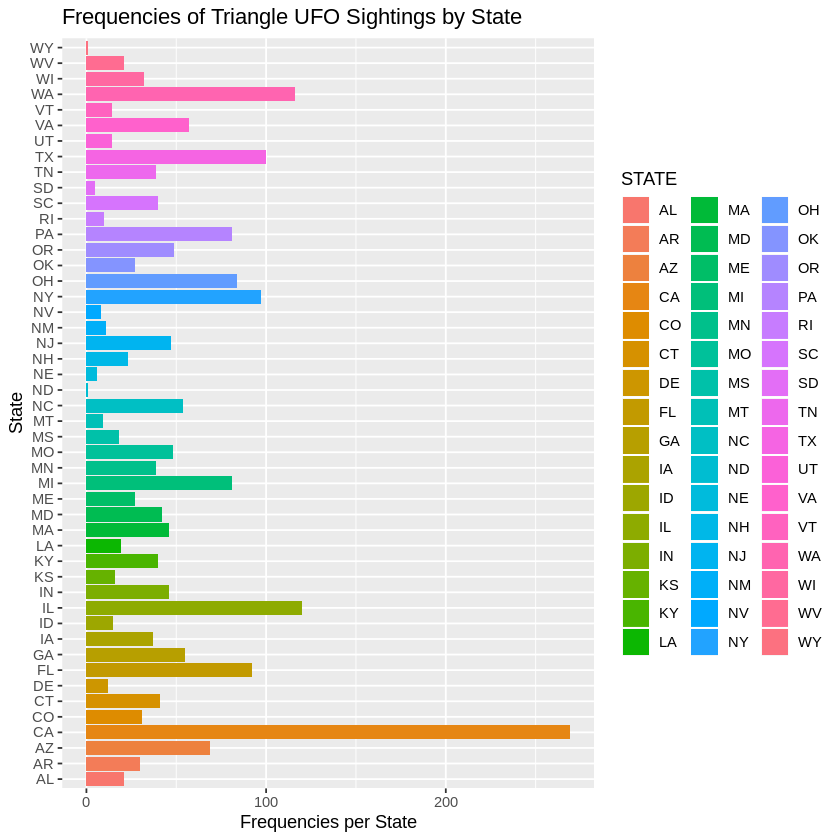

In [55]:
state


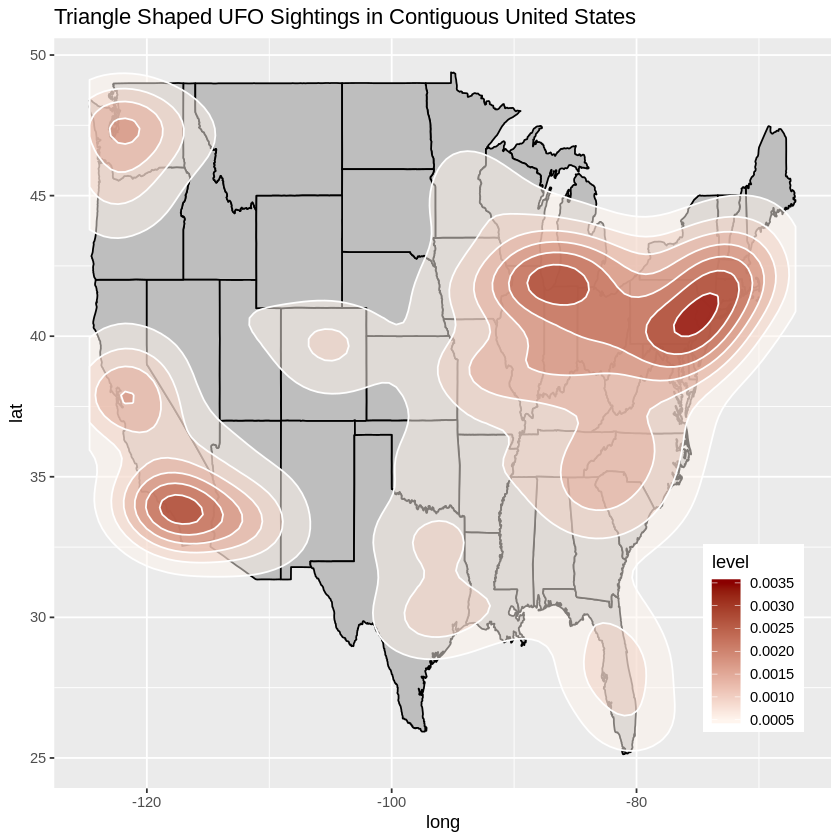

In [85]:
density

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



Stage 1 consists of project definition, requirements, and expectations. This would consist of the club telling me what they expected me to find (when and where should we go to find triangle shaped ufos). This also consisted of me thinking about where to find the data bases that I need. This also included me setting a time line for myself.

Stage 2 Data Acquisiotion, Governance, Curation and Source Code Management - This step is critical to the process and consists of me actually acquiring my data and loading it into the notebook. I downloaded the ufo data from kaggle, and it was originally from _____, which is widely used in the field according to my research. I also downloaded the aviation data from kaggle, and loaded them both in via read.csv.

Stage 3 - Data Shaping and Carpentry  - This step was when I first got to look at my data. I used summary() for this. Once I realized how large the data set was, I knew a big step was going to be filtering. Before filtering though, I had to clean. Cleaning for me consisted of cleaning column names, column values (such as capitalising state abbreviations). This is where I believe I showed most of my skills

Stage 4 -Exploratorty Data Analysis and Visalization - This step looks for relationships, for me I looked at sightings compared to certain variables. I eventually created visualizations to show density of ufo sightings, and even made a vizualization that showed density and airport locations, in hoping of being able to acknowldege that some upticks of sightings in certain locations could be tied to nearby airports.

Stage 5 - Statistical Machine Learning Model Planning Building and Testing - this step cosists of building statistical and machine learning models. In addition, it's an opprotunity to check that your methods are going to lead to your desired results as well as assessing performance and optimization. 

Stage 6 - Stastical/Machine Learning Model Valudation, visualization and outcomes - this is where you link outcomes to  original goals and evaluate the accuracy of the model in questions. It's also the step where the Data Scientist usually acknowledges any suprises. 

Stage 7 - This is essentially reporting back to the person you got the task from, with a full story as to your results compele with visualizations for reporting. The data sceintist should point out further research that should be done, significance of findings, all while putting together an articulate narritive. This would be like me summarizing my results for the club.

# Save your notebook, then `File > Close and Halt`